### Predicting Car Prices

In this project, we will apply k-NN to predict car prices. We will use a dataset that contains car features and it's market price.

The dataset can be downloaded directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). More information about the dataset is found [here](https://archive.ics.uci.edu/ml/datasets/automobile).

We evaluated the error using RMSE with a training set of 75% of the data. The best model used three features (horsepower, width and city-mpg) and resulted in a RMSE of 1997.5.


### Reading the data

In [342]:
import pandas as pd

columns = ['symboling', 'normalized_losses', 'make:', 'fuel-type', 'aspirations',
               'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
               'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
               'num_of_cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
               'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
               'price']

cars = pd.read_csv('imports-85.data', names = columns)

In [343]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make:                205 non-null object
fuel-type            205 non-null object
aspirations          205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

The columns that are numeric and can be used as features are: symboling, wheel_base, length, width, height, curb_weight, engine-size, compression-ration, city-mpg and highway-mpg. 

The target column we would like to predict is the price.

In [344]:
cars.head()

,symboling,normalized_losses,make:,fuel-type,aspirations,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Processing the data

In the next steps, we will process the data so it is suited to the predictive modeling.

In the first step of the analysis we will utilize only columns with numerical types. So we will isolate this data as numeric cars. 

The first next is to process the missing values in the columns, and transform every column into a numeric type.

In [345]:
import numpy as np

numeric_columns = [ 'normalized_losses', 'wheel_base', 'length', 'width', 
                   'height','curb_weight', 'bore', 'stroke', 'compression-ratio', 
                   'horsepower','peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[numeric_columns]
numeric_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


The normalized_losses, bore, stroke, horsepower, peak-rpm and price have the type object instead of float or int, which indicates a string in some columns. We will look this rows in detail so we can convert all columns to a numeric type.

In [346]:
object_columns = ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
numeric_cars[object_columns].head(10)

,normalized_losses,bore,stroke,horsepower,peak-rpm,price
0,?,3.47,2.68,111,5000,13495
1,?,3.47,2.68,111,5000,16500
2,?,2.68,3.47,154,5000,16500
3,164,3.19,3.40,102,5500,13950
4,164,3.19,3.40,115,5500,17450
5,?,3.19,3.40,110,5500,15250
6,158,3.19,3.40,110,5500,17710
7,?,3.19,3.40,110,5500,18920
8,158,3.13,3.40,140,5500,23875
9,?,3.13,3.40,160,5500,?


It appears that the columns with missing values have a string "?" on it's rows. We will substitute those values for null and convert the column into float type.

In [347]:
import numpy as np

numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars[object_columns] = numeric_cars[object_columns].astype('float')
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(3)
memory usage: 22.5 KB


In [348]:
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There is some nulls value in some columns. We will delete all rows with null prices and after we will substitute the lines with the null values for the column average.

In [349]:
numeric_cars = numeric_cars.dropna(subset=['price'] )
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
city-mpg             201 non-null int64
highway-mpg          201 non-null int64
price                201 non-null float64
dtypes: float64(11), int64(3)
memory usage: 23.6 KB


After correcting the null values, we will normalize all columns (except price) to a range from 0 to 1.

In [350]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

### Using an univariate model

In this step, we will test all columns and five values of k (1, 3, 5, 7 and 9) and evaluates it's performance using RMSE. We will separate the data into a training set (75%) and a test set (25%). 

We will do this by firstly defining a function that takes a training column, a target column, a dataset and a value of k and returns the RMSE. Then we will use this function to loop trough the data.

In [351]:
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_column, target_column, dataframe, k):
    # Shuffling the index and creating two sets:
    shuffled_index = np.random.permutation(dataframe.index)
    dataframe = dataframe.reindex(shuffled_index)
    train_df = dataframe.iloc[0:150]
    test_df = dataframe.iloc[150:]   

    # Apllying the model
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[[training_column]], train_df[target_column])
    predictions = knn.predict(test_df[[training_column]])
    
    # Returning the RMSE
    mse = mean_squared_error(test_df[target_column], predictions) 
    return sqrt(mse)

We will build a dictionary containing the feature as a key and as value a list containing the RMSE for the k_values.

In [352]:
features = list(numeric_cars)
features.remove('price')
k_values = [1, 3, 5, 7, 9]
mse_dict = {}

for column in features:
    mse_list = []
    mse_dict[column] = mse_list
    for k in k_values:
        mse = round(knn_train_test(column, 'price', numeric_cars, k), 1)
        mse_list.append(mse)       


In [353]:
univariate_mse = pd.DataFrame(data = mse_dict)
univariate_mse['k'] = [1, 3, 5, 7, 9]
univariate_mse = univariate_mse.set_index('k')
univariate_mse

,bore,city-mpg,compression-ratio,curb_weight,height,highway-mpg,horsepower,length,normalized_losses,peak-rpm,stroke,wheel_base,width
k,,,,,,,,,,,,,
1,6644.6,6299.5,6648.4,6004.1,9498.3,4388.8,4654.3,5943.2,6434.8,9609.3,9763.6,7305.5,5200.3
3,4476.1,3480.8,7289.5,5468.4,9204.6,4826.1,3271.8,7124.2,8182.5,7524.1,5530.2,3901.5,4540.5
5,4873.1,3092.0,6148.0,3191.3,10514.5,5044.8,3637.8,4730.1,6955.7,9241.5,7055.6,5418.5,4215.0
7,6067.1,4503.1,7518.1,2586.7,6990.9,6309.0,3710.4,5735.9,6938.2,7980.3,8486.6,6519.1,4999.9
9,5907.6,5196.3,6717.0,3983.1,8382.9,3569.4,4567.4,5689.4,7579.4,7535.7,7144.9,8311.3,5824.0


In [354]:
univariate_mse.mean().sort_values()

horsepower           3968.34
curb_weight          4246.72
city-mpg             4514.34
highway-mpg          4827.62
width                4955.94
bore                 5593.70
length               5844.56
wheel_base           6291.18
compression-ratio    6864.20
normalized_losses    7218.12
stroke               7596.18
peak-rpm             8378.18
height               8918.24
dtype: float64

In [355]:
univariate_mse.min().sort_values()

curb_weight          2586.7
city-mpg             3092.0
horsepower           3271.8
highway-mpg          3569.4
wheel_base           3901.5
width                4215.0
bore                 4476.1
length               4730.1
stroke               5530.2
compression-ratio    6148.0
normalized_losses    6434.8
height               6990.9
peak-rpm             7524.1
dtype: float64

([<matplotlib.axis.XTick at 0x7f8addbe7c18>,
 <a list of 5 Text xticklabel objects>)

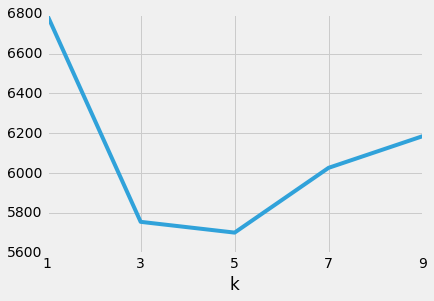

In [356]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.style.use('fivethirtyeight')

univariate_mse.mean(axis=1).plot()
plt.xticks([1,3,5,7,9])

Analysing the data, we can see that the horsepower is the best single feature to predict the price, having the lowest average and minimum RMSE. 

Also, analysing the values of k, we can see that the values increase from 1 to 3 and to 5, but decreases for k equal to seven and nine. The next step is to see how the k values behaves for the three best features (horsepower, city-mpg, width

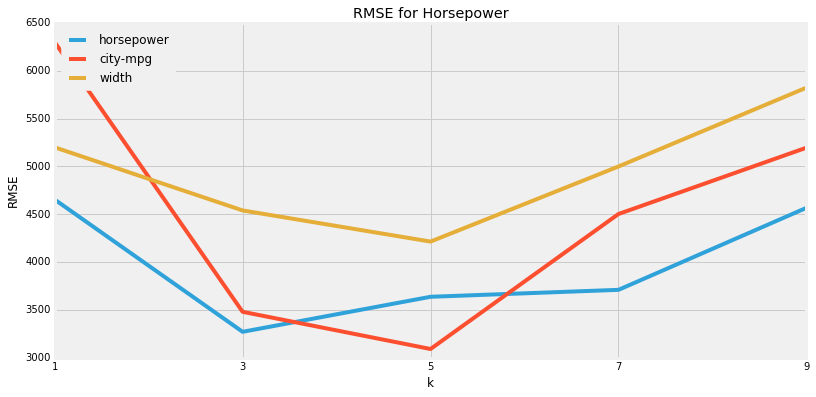

In [357]:
import matplotlib.pyplot as plt
% matplotlib inline


fig, ax = plt.subplots(figsize=(12,6))

univariate_mse['horsepower'].plot()
univariate_mse['city-mpg'].plot()
univariate_mse['width'].plot()
plt.xticks([1,3,5,7,9])
plt.title('RMSE for Horsepower')
plt.ylabel('RMSE')
plt.xlabel('k')
plt.legend(loc='upper left')


As we can see in the graph, for the horsepower column the best value for k is 1, for city-mpg it's 5 and for width it's 3 or 5. This shows that the optimal level of k depends of the features analysed.

### Using a multivariate model

In the next step, we will modify our function to consider more than one feature. We will test the performance of 2, 3, 4, 5 features (we will choose them by looking at the best features in the last step). After, we will compare those models with the use of all features in the dataset.

All the comparison will be made varying the k values from 1 to 9. 

In [358]:
def knn_train_test_multi(training_columns, target_column, dataframe, k):
    # Shuffling the index and creating two sets:
    shuffled_index = np.random.permutation(dataframe.index)
    dataframe = dataframe.reindex(shuffled_index)
    train_df = dataframe.iloc[0:150]
    test_df = dataframe.iloc[150:]   

    # Apllying the model
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_df[training_columns], train_df[target_column])
    predictions = knn.predict(test_df[training_columns])
    
    # Returning the RMSE
    mse = mean_squared_error(test_df[target_column], predictions) 
    return sqrt(mse)

In [359]:
rmse = knn_train_test_multi(['horsepower', 'width'], 'price', numeric_cars, 2)

In [360]:
two_features = ['horsepower', 'width']
three_features = ['horsepower', 'width', 'city-mpg']
four_features = ['horsepower', 'width', 'city-mpg', 'curb_weight']
five_features = ['horsepower', 'width', 'city-mpg', 'curb_weight', 'highway-mpg']
all_features = list(numeric_cars.columns)
all_features.remove('price')
feature_combination = [two_features, three_features, four_features, five_features, all_features]
feature_names= ['two_features', 'three_features', 'four_features', 'five_features', 'all_features']
k_values = [i for i in range(1, 26)]
mse_dict_multi = {}

for index, features in enumerate(feature_combination):
    mse_list = []
    mse_dict_multi[feature_names[index]] = mse_list
    for k in k_values:
        mse = round(knn_train_test_multi(features, 'price', numeric_cars, k), 1)
        mse_list.append(mse)       


In [361]:
multivariate_mse = pd.DataFrame(data = mse_dict_multi)
multivariate_mse['k'] = k_values
multivariate_mse =multivariate_mse.set_index('k')
multivariate_mse

,all_features,five_features,four_features,three_features,two_features
k,,,,,
1,2597.0,2392.2,2898.5,2703.8,3165.7
2,5378.5,2334.6,3488.6,2539.4,3267.4
3,2815.5,2520.0,2470.1,3517.0,2788.6
4,4602.4,2808.4,2612.3,4741.4,3200.9
5,3471.3,2401.7,2038.0,2991.8,4367.1
6,3617.6,3927.8,4068.9,3748.0,3001.6
7,3172.4,3097.5,2411.6,2725.7,5286.2
8,5284.0,2518.3,2564.5,3127.9,3052.0
9,3163.3,4739.7,2570.3,3150.0,2817.3


In [362]:
multivariate_mse.min().sort_values()

four_features     2038.0
five_features     2334.6
three_features    2539.4
all_features      2597.0
two_features      2788.6
dtype: float64

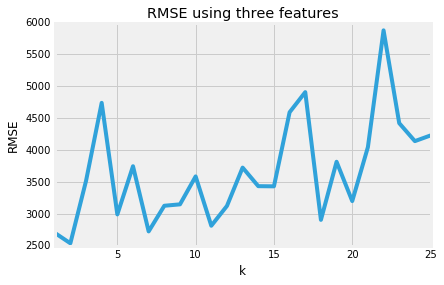

In [363]:
multivariate_mse['three_features'].plot()
plt.title('RMSE using three features')
plt.ylabel('RMSE')
plt.xlabel('k')

The best model (lowest RMSE) was using three features (horsepower, width and city-mpg) and a k value of 2 (RMSE equals to 1997.5).

### Conclusions

The biggest conclusion of this project is that using more features than just one is better (we reduced the RMSE from 2599.6 to 1997.5 comparing the univariate model to three features).

Nevertheless, increasing the number of features is not always better; in this project, using four, five or all features increased the errors. Also, the same logic applies to the hyperparameter k, the ideal number depends on the number of features; using three features the best value was 3 (bigger values increased the RMSE).